In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
sns.set_theme(rc={"figure.dpi": 500})

In [21]:
def strong_plot(file, label):
    df = pd.read_csv(file, sep=", ", engine="python")
    df_avg = df.groupby("n_threads").mean()
    df["speedup"] = df_avg["time"].iloc[0] / df["time"]

    with sns.axes_style("whitegrid"):
        ax = sns.lineplot(x="n_threads", y="speedup", data=df, marker="o", label=label, errorbar="sd")
        ax.set(xlabel="Number of threads", ylabel="Speedup")
        plt.xscale("log", base=2)

In [22]:
def weak_plot(file, label):
    df = pd.read_csv(file, sep=", ", engine="python")
    df_avg = df.groupby("n_threads").mean()
    df["eff"] = df_avg["time"].iloc[0] / df["time"]

    with sns.axes_style("whitegrid"):
        ax = sns.lineplot(x="n_threads", y="eff", data=df, marker="o", label=label, errorbar="sd")
        ax.set(xlabel="Number of threads", ylabel="Efficiency")
        plt.xscale("log", base=2)

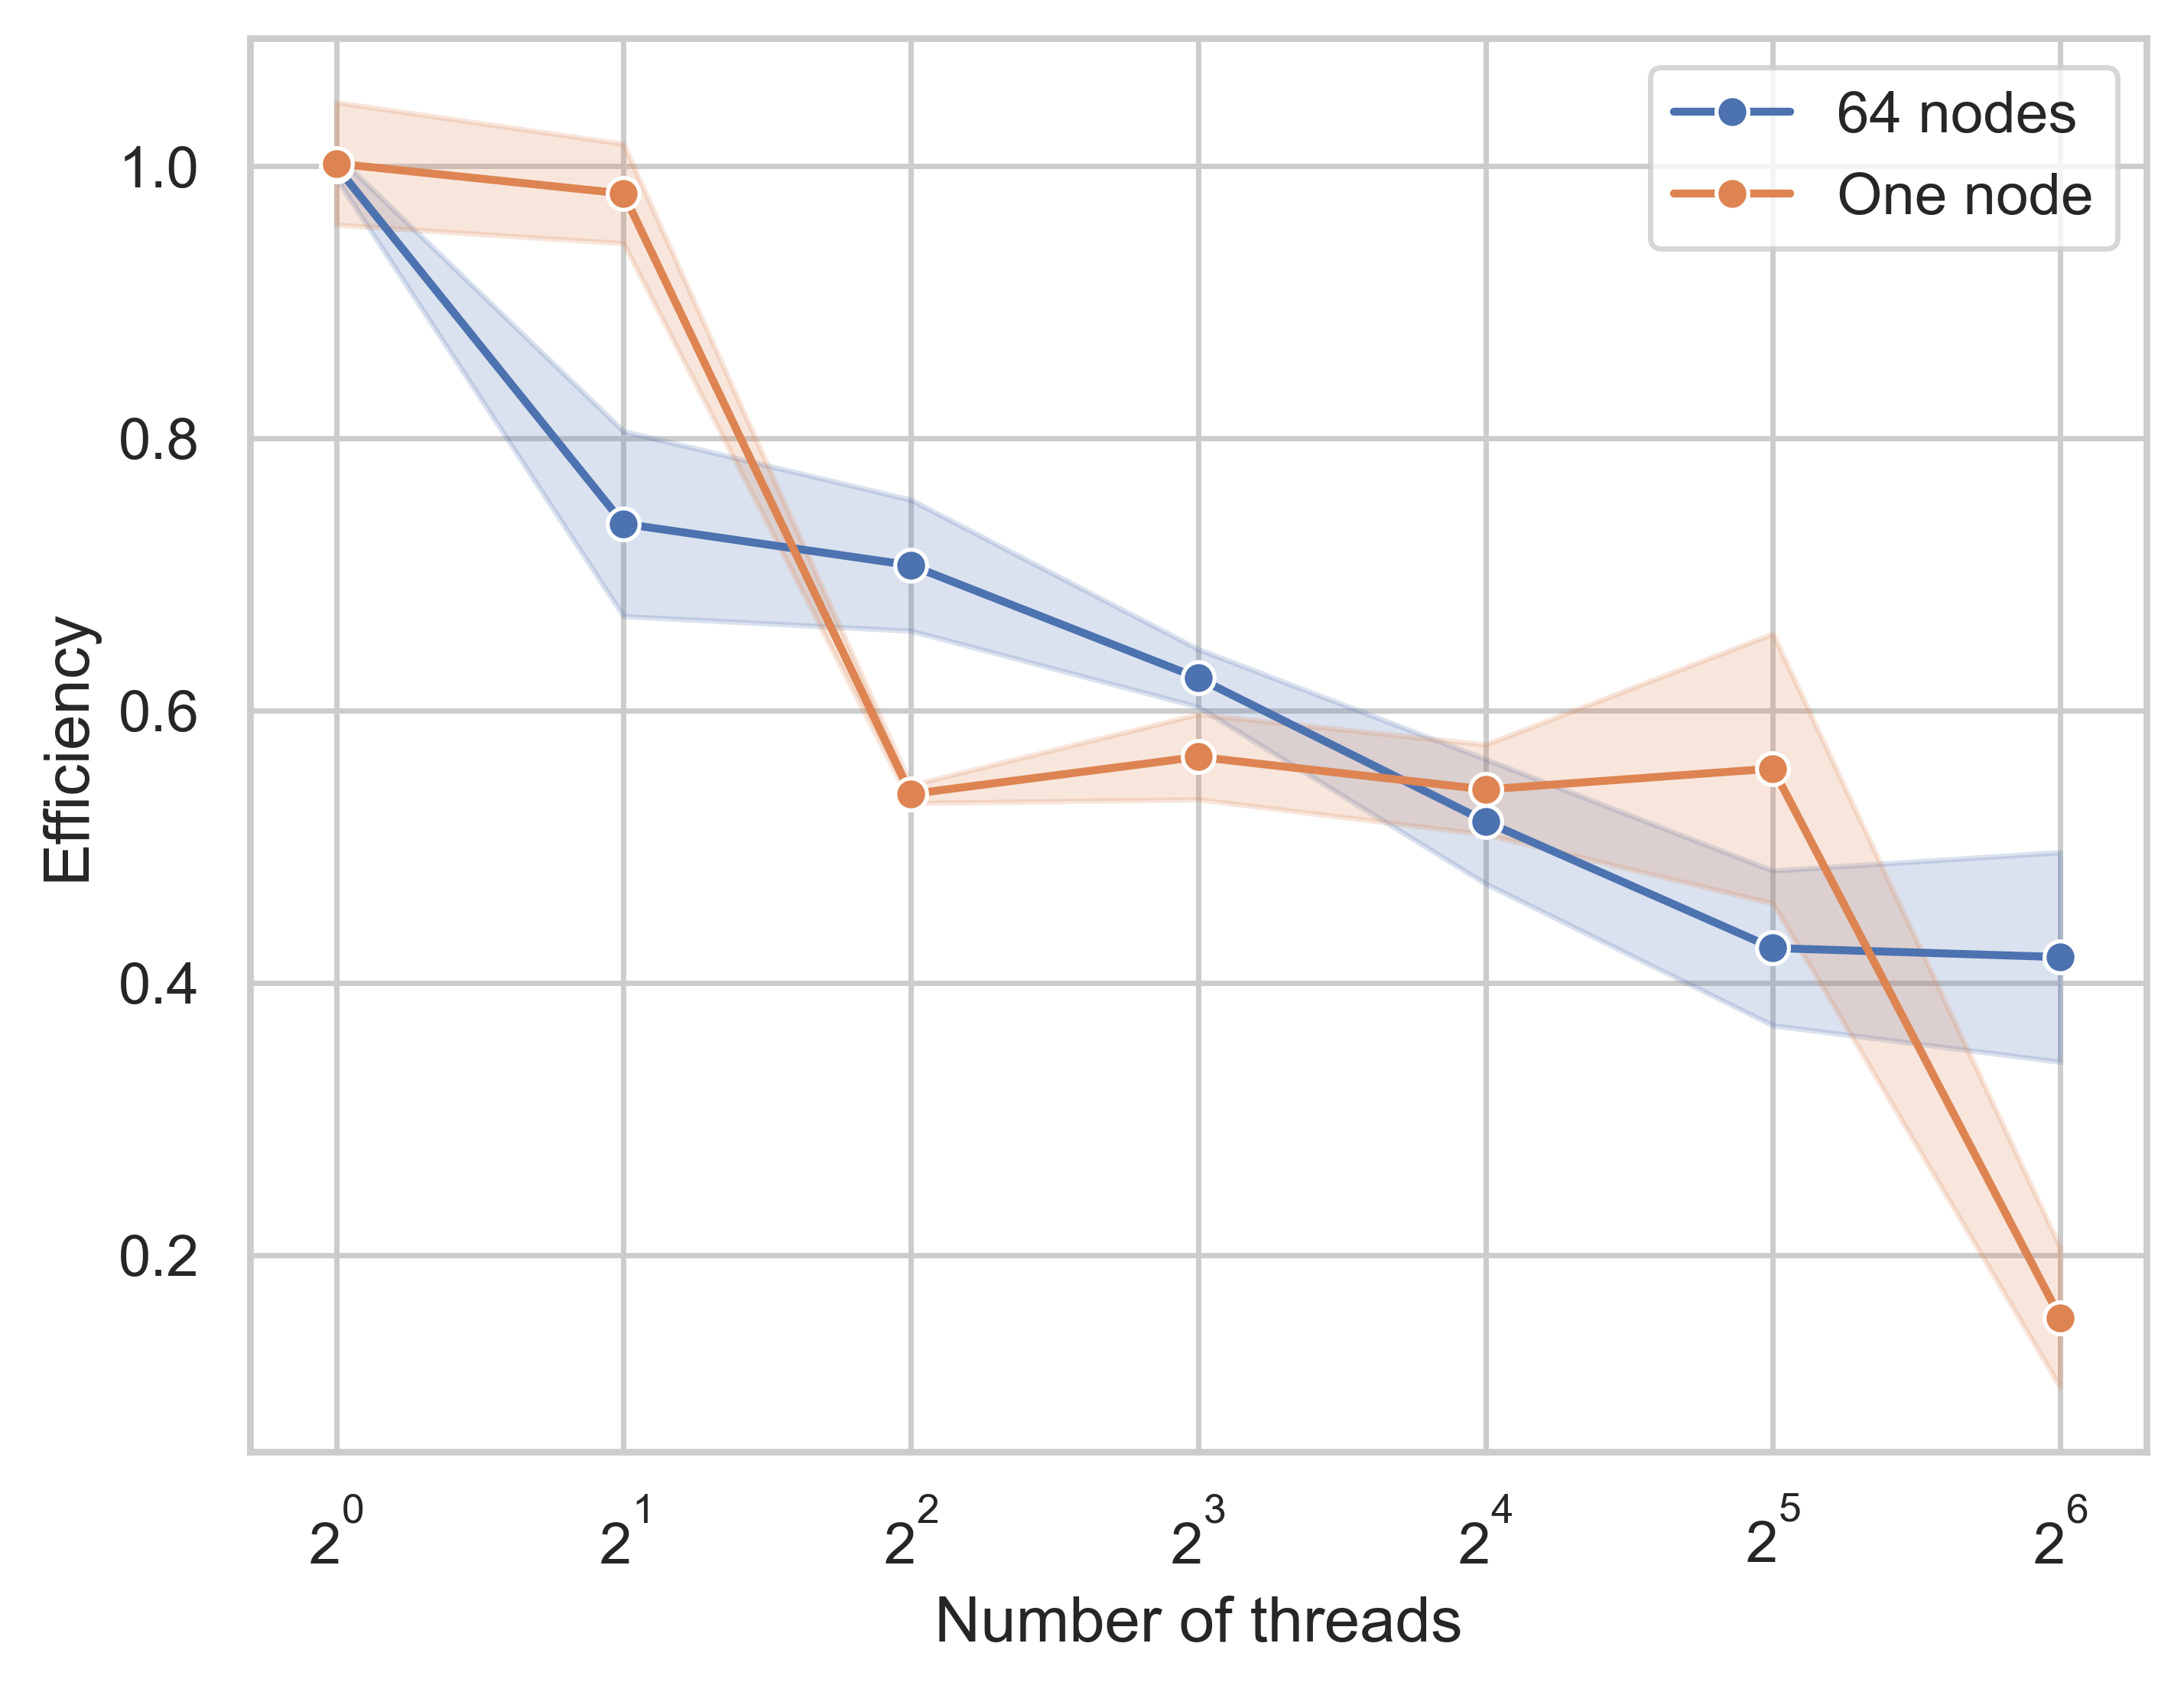

In [23]:
weak_plot("weak_scaling_multi.txt", "64 nodes")
weak_plot("weak_scaling_single_old.txt", "One node")
plt.savefig("weak_scaling.png")

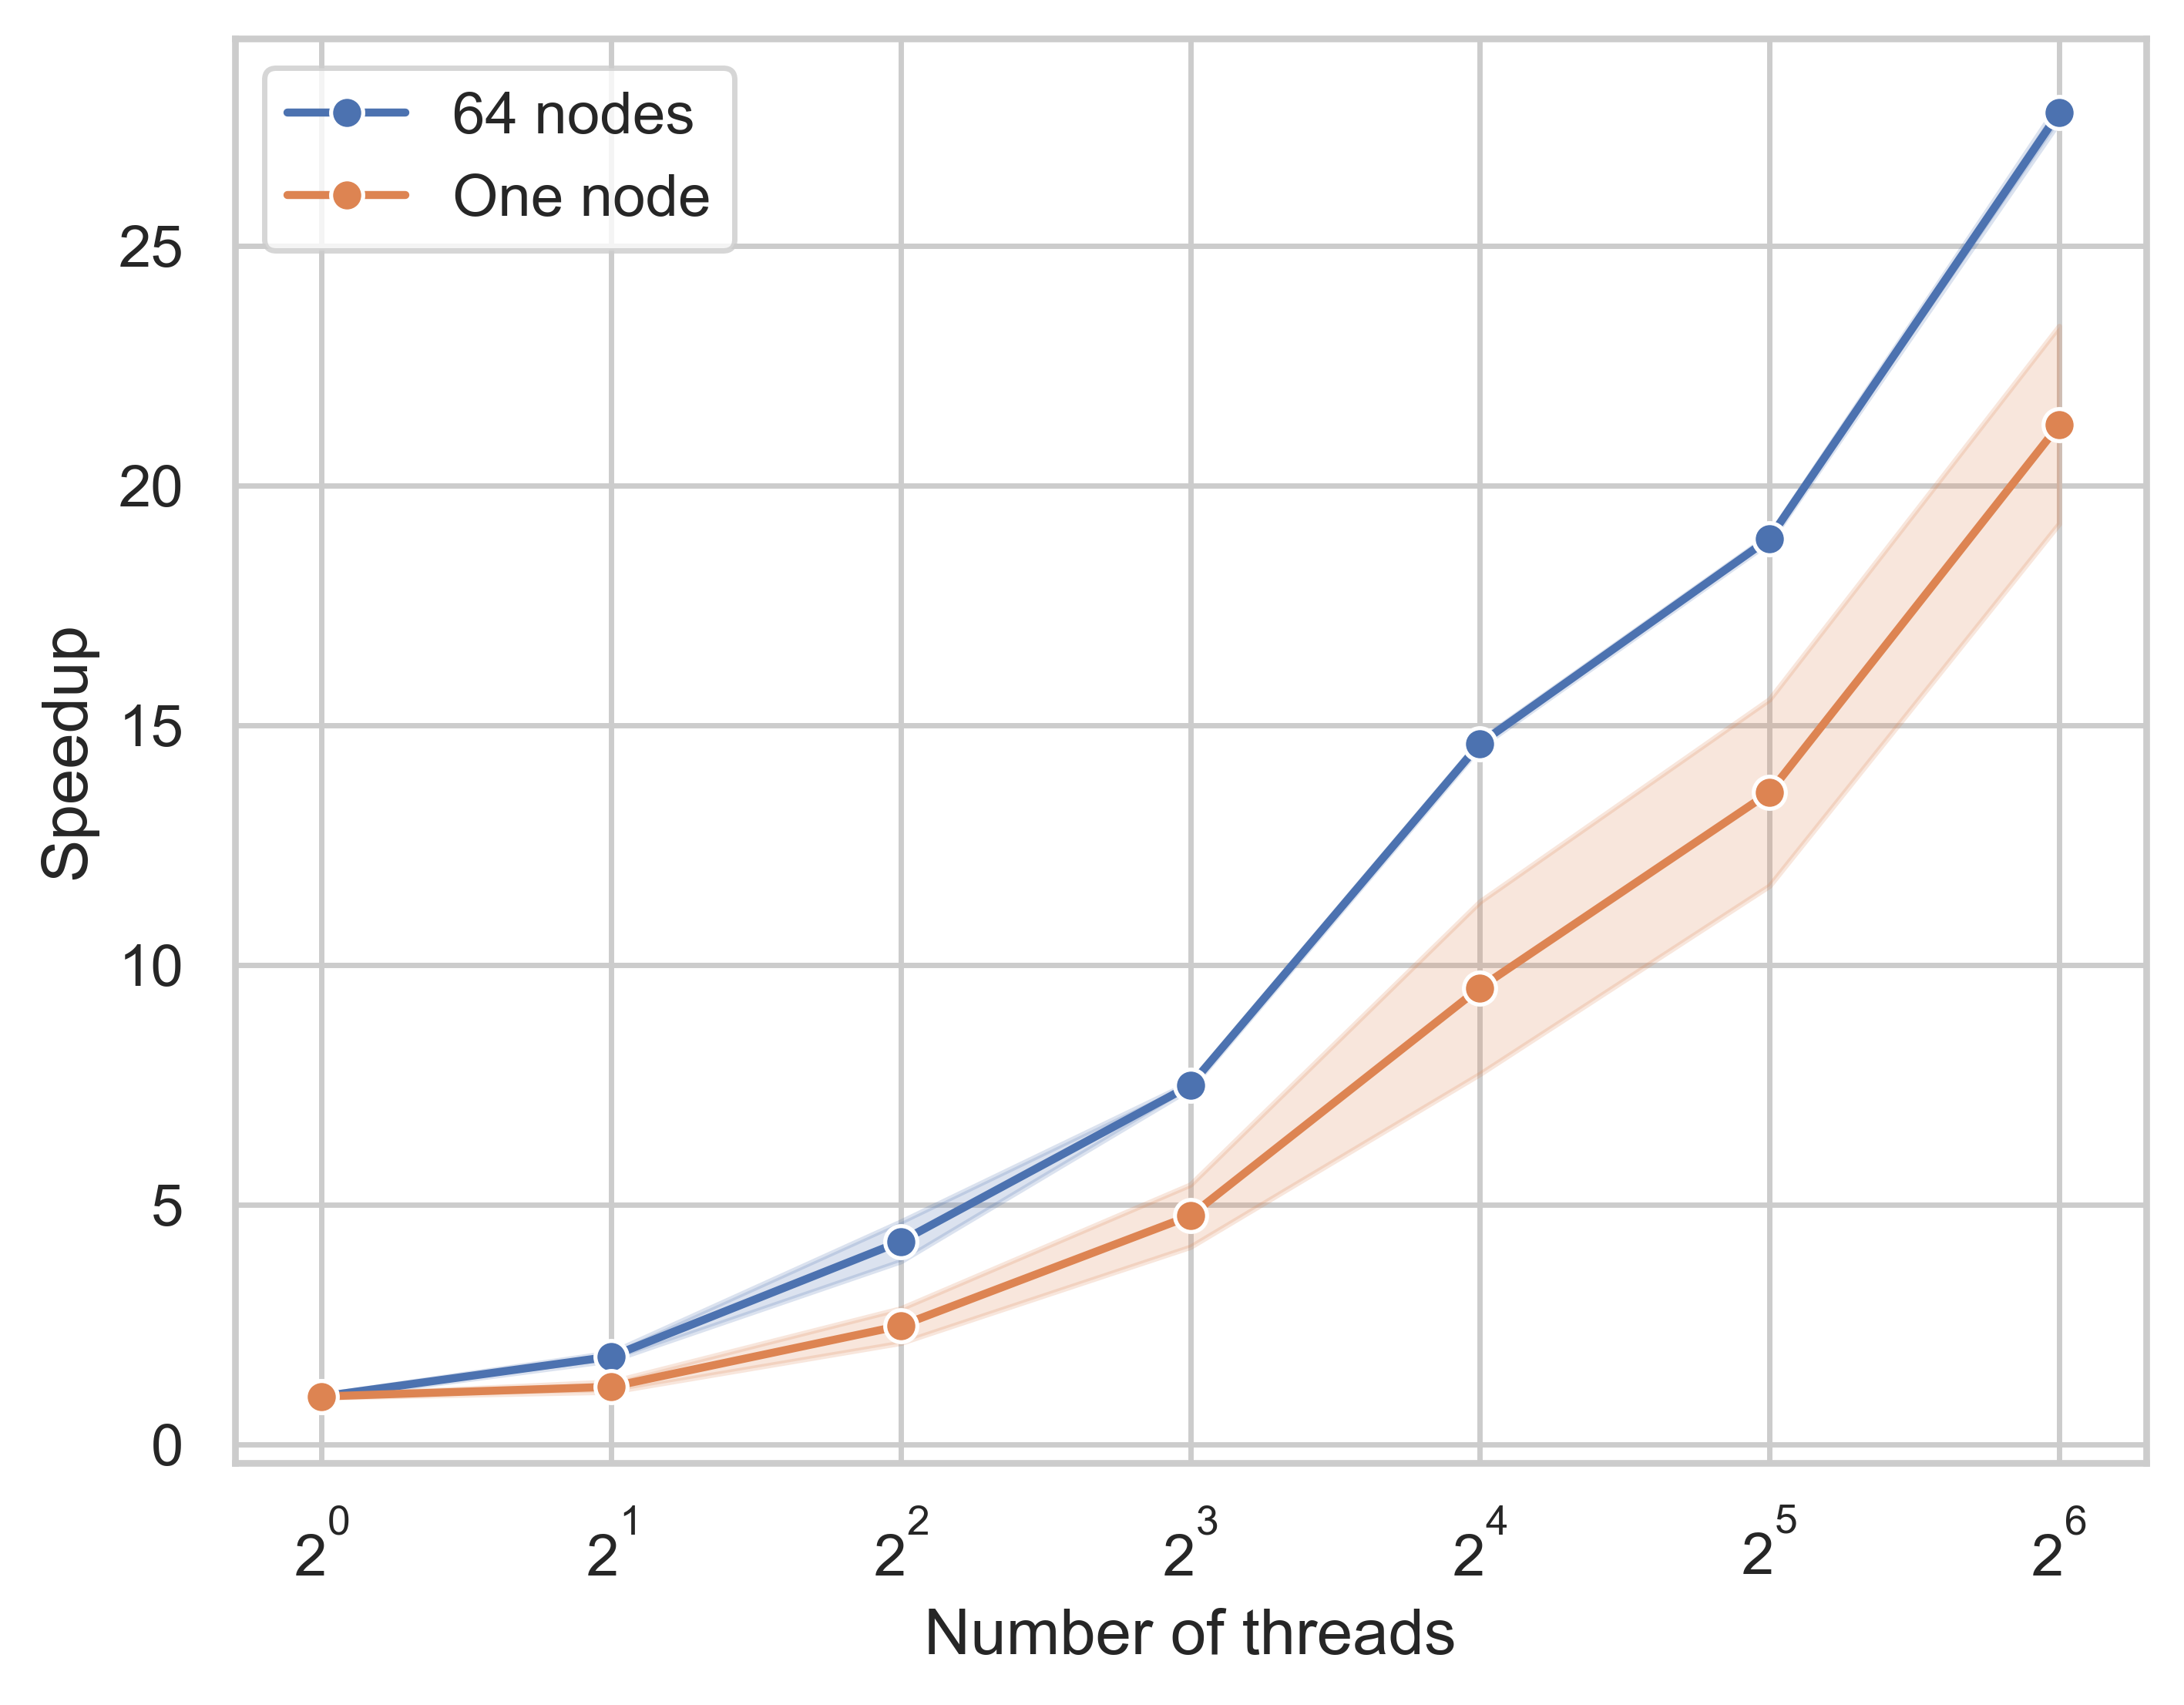

In [24]:
strong_plot("strong_scaling_multi.txt", "64 nodes")
strong_plot("strong_scaling_single.txt", "One node")
plt.savefig("strong_scaling.png")